In [1]:
import os

import numpy as np
import pandas as pd
from sklearn import preprocessing
import xgboost as xgb
import lightgbm as lgbm

import seaborn as sns
import matplotlib.pyplot as plt
import gc

from scipy.stats import rankdata

In [2]:
for col, values in df_train.iteritems():
    num_uniques = values.nunique()
    print ('{name}: {num_unique}'.format(name=col, num_unique=num_uniques))
    print (values.unique())
    print ('\n')

NameError: name 'df_train' is not defined

In [11]:
lgbm2=pd.read_csv('lightgbm _2.csv')
lgbm3=pd.read_csv('lightgbm_3.csv')
lgbm5=pd.read_csv('lightgbm_5.csv')
lgbm_new=pd.read_csv('lightgbm_new.csv')
lgbm_new_1=pd.read_csv('lightgbm_new_1.csv')

In [12]:
d={"1":rankdata(lgbm2['isFraud']),"3":rankdata(lgbm5['isFraud']),'4':rankdata(lgbm_new['isFraud']),'5':rankdata(lgbm_new_1['isFraud'])}
pd.DataFrame(data=d).corr()

,1,3,4,5
1,1.000000,0.989085,0.981416,0.976852
3,0.989085,1.000000,0.985068,0.979046
4,0.981416,0.985068,1.000000,0.982167
5,0.976852,0.979046,0.982167,1.000000


In [13]:
from scipy.stats import rankdata
lgbm2['isFraud']=rankdata(lgbm2['isFraud'])*rankdata(lgbm_new_1['isFraud'])*rankdata(lgbm5['isFraud'])*rankdata(lgbm_new['isFraud'])**(1/4)
lgbm2['isFraud']=lgbm2['isFraud']/lgbm2['isFraud'].max()
lgbm2.to_csv('lightgbm.csv',index=False)

In [19]:
%%time
train_transaction = pd.read_csv('input/train_transaction.csv', index_col='TransactionID')
test_transaction = pd.read_csv('input/test_transaction.csv', index_col='TransactionID')


train_identity = pd.read_csv('input/train_identity.csv', index_col='TransactionID')
test_identity = pd.read_csv('input/test_identity.csv', index_col='TransactionID')

sample_submission = pd.read_csv('input/sample_submission.csv', index_col='TransactionID')

train_df = train_transaction.merge(train_identity, how='left', left_index=True, right_index=True)
test_df = test_transaction.merge(test_identity, how='left', left_index=True, right_index=True)
    
print(train_df.shape)
print(test_df.shape)

train_label = train_df['isFraud'].copy()
train_df = train_df.drop('isFraud', axis=1)


(590540, 433)
(506691, 432)
CPU times: user 41.3 s, sys: 3.92 s, total: 45.2 s
Wall time: 45.2 s


## EDA

In [22]:

emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'protonmail', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

for c in ['P_emaildomain', 'R_emaildomain']:
    train_df[c + '_bin'] = train_df[c].map(emails)
    test_df[c + '_bin'] = test_df[c].map(emails)
    
    train_df[c + '_suffix'] = train_df[c].map(lambda x: str(x).split('.')[-1])
    test_df[c + '_suffix'] = test_df[c].map(lambda x: str(x).split('.')[-1])
    
    train_df[c + '_suffix'] = train_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test_df[c + '_suffix'] = test_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

train_df['email_domain_comp'] = (train_df['P_emaildomain'].values == train_df['R_emaildomain'].values).astype(int)
test_df['email_domain_comp'] = (test_df['P_emaildomain'].values == test_df['R_emaildomain'].values).astype(int)

train_df['email_domain_suffix_bin'] = (train_df['P_emaildomain_bin'].values == train_df['R_emaildomain_bin'].values).astype(int)
test_df['email_domain_suffix_bin'] = (test_df['P_emaildomain_bin'].values == test_df['R_emaildomain_bin'].values).astype(int)

train_df['email_domain_suffix_comp'] = (train_df['P_emaildomain_suffix'].values == train_df['R_emaildomain_suffix'].values).astype(int)
test_df['email_domain_suffix_comp'] = (test_df['P_emaildomain_suffix'].values == test_df['R_emaildomain_suffix'].values).astype(int)

train_df['resolution1']=train_df['id_33'].map(lambda x: str(x).split('x')[0])
train_df['resolution2']=train_df['id_33'].map(lambda x: str(x).split('x')[-1])

test_df['resolution1']=test_df['id_33'].map(lambda x: str(x).split('x')[0])
test_df['resolution2']=test_df['id_33'].map(lambda x: str(x).split('x')[-1])

In [25]:
from tqdm import tqdm_notebook as tqdm

from itertools import combinations

def agg_feat(train_df,test_df,grp_cols):
    count=0
    new_name=""
    for c in grp_cols:
        new_name += c+'_'
    for c in grp_cols:
        if count==0:
            train_df[new_name] = train_df[c].astype(str)+'_'
            test_df[new_name] = test_df[c].astype(str)+'_'
            count+=1
        else:
            train_df[new_name] += train_df[c].astype(str)+'_'
            test_df[new_name] += test_df[c].astype(str)+'_'
            
    return train_df,test_df

train_df,test_df=agg_feat(train_df,test_df,['TransactionAmt','ProductCD']+cards)
train_df,test_df=agg_feat(train_df,test_df,['ProductCD']+cards)        
train_df,test_df=agg_feat(train_df,test_df,['TransactionAmt','ProductCD'])

train_df,test_df=agg_feat(train_df,test_df,cards)

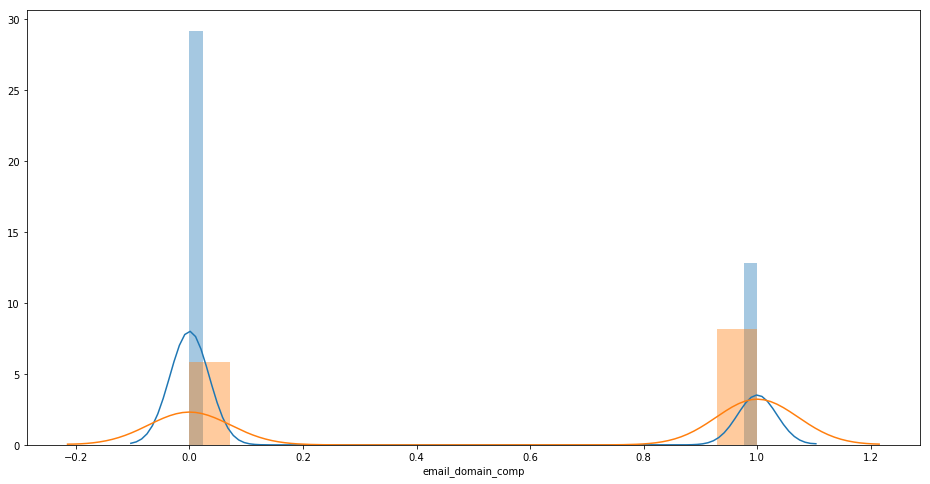

In [23]:
vars_='email_domain_comp'
plt.figure(figsize=(16,8))
sns.distplot(train_df[train_label==0][vars_].reset_index(drop=True))
sns.distplot(train_df[train_label==1][vars_].reset_index(drop=True))

In [15]:
train_df=train_df.fillna(-999)
test_df=test_df.fillna(-999)

In [20]:
train_df['online']=0
test_df['online']=0
train_df.loc[train_identity.index.values,'online']=1
test_df.loc[test_identity.index.values,'online']=1

train_df['missing']=train_df.isnull().sum(axis=1)
test_df['missing']=test_df.isnull().sum(axis=1)
train_df=train_df.fillna(-999)
test_df=test_df.fillna(-999)

train_df=train_df.reset_index(drop=True)
train_label=train_label.reset_index(drop=True)
test_df=test_df.reset_index(drop=True)

del train_transaction, train_identity, test_transaction, test_identity
gc.collect()

206

In [6]:
import numpy as np
import pandas as pd
from collections import defaultdict
from scipy.stats import hmean
from scipy.spatial.distance import cdist
from scipy import stats
import numbers


def weighted_hamming(data):
    """ Compute weighted hamming distance on categorical variables. For one variable, it is equal to 1 if
        the values between point A and point B are different, else it is equal the relative frequency of the
        distribution of the value across the variable. For multiple variables, the harmonic mean is computed
        up to a constant factor.

        @params:
            - data = a pandas data frame of categorical variables

        @returns:
            - distance_matrix = a distance matrix with pairwise distance for all attributes
    """
    categories_dist = []
    
    for category in data:
        X = pd.get_dummies(data[category])
        X_mean = X * X.mean()
        X_dot = X_mean.dot(X.transpose())
        X_np = np.asarray(X_dot.replace(0,1,inplace=False))
        categories_dist.append(X_np)
    categories_dist = np.array(categories_dist)
    distances = hmean(categories_dist, axis=0)
    return distances


def distance_matrix(data, numeric_distance = "euclidean", categorical_distance = "jaccard"):
    """ Compute the pairwise distance attribute by attribute in order to account for different variables type:
        - Continuous
        - Categorical
        For ordinal values, provide a numerical representation taking the order into account.
        Categorical variables are transformed into a set of binary ones.
        If both continuous and categorical distance are provided, a Gower-like distance is computed and the numeric
        variables are all normalized in the process.
        If there are missing values, the mean is computed for numerical attributes and the mode for categorical ones.
        
        Note: If weighted-hamming distance is chosen, the computation time increases a lot since it is not coded in C 
        like other distance metrics provided by scipy.

        @params:
            - data                  = pandas dataframe to compute distances on.
            - numeric_distances     = the metric to apply to continuous attributes.
                                      "euclidean" and "cityblock" available.
                                      Default = "euclidean"
            - categorical_distances = the metric to apply to binary attributes.
                                      "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                      available. Default = "jaccard"

        @returns:
            - the distance matrix
    """
    possible_continuous_distances = ["euclidean", "cityblock"]
    possible_binary_distances = ["euclidean", "jaccard", "hamming", "weighted-hamming"]
    number_of_variables = data.shape[1]
    number_of_observations = data.shape[0]

    # Get the type of each attribute (Numeric or categorical)
    is_numeric = [all(isinstance(n, numbers.Number) for n in data.iloc[:, i]) for i, x in enumerate(data)]
    is_all_numeric = sum(is_numeric) == len(is_numeric)
    is_all_categorical = sum(is_numeric) == 0
    is_mixed_type = not is_all_categorical and not is_all_numeric

    # Check the content of the distances parameter
    if numeric_distance not in possible_continuous_distances:
        print ("The continuous distance " + numeric_distance + " is not supported.")
        return None
    elif categorical_distance not in possible_binary_distances:
        print ("The binary distance " + categorical_distance + " is not supported.")
        return None

    # Separate the data frame into categorical and numeric attributes and normalize numeric data
    if is_mixed_type:
        number_of_numeric_var = sum(is_numeric)
        number_of_categorical_var = number_of_variables - number_of_numeric_var
        data_numeric = data.iloc[:, is_numeric]
        data_numeric = (data_numeric - data_numeric.mean()) / (data_numeric.max() - data_numeric.min())
        data_categorical = data.iloc[:, [not x for x in is_numeric]]

    # Replace missing values with column mean for numeric values and mode for categorical ones. With the mode, it
    # triggers a warning: "SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame"
    # but the value are properly replaced
    if is_mixed_type:
        data_numeric.fillna(data_numeric.mean(), inplace=True)
        for x in data_categorical:
            data_categorical[x].fillna(data_categorical[x].mode()[0], inplace=True)
    elif is_all_numeric:
        data.fillna(data.mean(), inplace=True)
    else:
        for x in data:
            data[x].fillna(data[x].mode()[0], inplace=True)

    # "Dummifies" categorical variables in place
    if not is_all_numeric and not (categorical_distance == 'hamming' or categorical_distance == 'weighted-hamming'):
        if is_mixed_type:
            data_categorical = pd.get_dummies(data_categorical)
        else:
            data = pd.get_dummies(data)
    elif not is_all_numeric and categorical_distance == 'hamming':
        if is_mixed_type:
            data_categorical = pd.DataFrame([pd.factorize(data_categorical[x])[0] for x in data_categorical]).transpose()
        else:
            data = pd.DataFrame([pd.factorize(data[x])[0] for x in data]).transpose()

    if is_all_numeric:
        result_matrix = cdist(data, data, metric=numeric_distance)
    elif is_all_categorical:
        if categorical_distance == "weighted-hamming":
            result_matrix = weighted_hamming(data)
        else:
            result_matrix = cdist(data, data, metric=categorical_distance)
    else:
        result_numeric = cdist(data_numeric, data_numeric, metric=numeric_distance)
        if categorical_distance == "weighted-hamming":
            result_categorical = weighted_hamming(data_categorical)
        else:
            result_categorical = cdist(data_categorical, data_categorical, metric=categorical_distance)
        result_matrix = np.array([[1.0*(result_numeric[i, j] * number_of_numeric_var + result_categorical[i, j] *
                               number_of_categorical_var) / number_of_variables for j in range(number_of_observations)] for i in range(number_of_observations)])

    # Fill the diagonal with NaN values
    np.fill_diagonal(result_matrix, np.nan)

    return pd.DataFrame(result_matrix)


def knn_impute(target, attributes, k_neighbors, aggregation_method="mean", numeric_distance="euclidean",
               categorical_distance="jaccard", missing_neighbors_threshold = 0.5):
    """ Replace the missing values within the target variable based on its k nearest neighbors identified with the
        attributes variables. If more than 50% of its neighbors are also missing values, the value is not modified and
        remains missing. If there is a problem in the parameters provided, returns None.
        If to many neighbors also have missing values, leave the missing value of interest unchanged.

        @params:
            - target                        = a vector of n values with missing values that you want to impute. The length has
                                              to be at least n = 3.
            - attributes                    = a data frame of attributes with n rows to match the target variable
            - k_neighbors                   = the number of neighbors to look at to impute the missing values. It has to be a
                                              value between 1 and n.
            - aggregation_method            = how to aggregate the values from the nearest neighbors (mean, median, mode)
                                              Default = "mean"
            - numeric_distances             = the metric to apply to continuous attributes.
                                              "euclidean" and "cityblock" available.
                                              Default = "euclidean"
            - categorical_distances         = the metric to apply to binary attributes.
                                              "jaccard", "hamming", "weighted-hamming" and "euclidean"
                                              available. Default = "jaccard"
            - missing_neighbors_threshold   = minimum of neighbors among the k ones that are not also missing to infer
                                              the correct value. Default = 0.5

        @returns:
            target_completed        = the vector of target values with missing value replaced. If there is a problem
                                      in the parameters, return None
    """

    # Get useful variables
    possible_aggregation_method = ["mean", "median", "mode"]
    number_observations = len(target)
    is_target_numeric = all(isinstance(n, numbers.Number) for n in target)

    # Check for possible errors
    if number_observations < 3:
        print( "Not enough observations.")
        return None
    if attributes.shape[0] != number_observations:
        print ("The number of observations in the attributes variable is not matching the target variable length.")
        return None
    if k_neighbors > number_observations or k_neighbors < 1:
        print ("The range of the number of neighbors is incorrect.")
        return None
    if aggregation_method not in possible_aggregation_method:
        print ("The aggregation method is incorrect.")
        return None
    if not is_target_numeric and aggregation_method != "mode":
        print ("The only method allowed for categorical target variable is the mode.")
        return None

    # Make sure the data are in the right format
    target = pd.DataFrame(target)
    attributes = pd.DataFrame(attributes)

    # Get the distance matrix and check whether no error was triggered when computing it
    distances = distance_matrix(attributes, numeric_distance, categorical_distance)
    if distances is None:
        return None

    # Get the closest points and compute the correct aggregation method
    for i, value in enumerate(target.iloc[:, 0]):
        if pd.isnull(value):
            order = distances.iloc[i,:].values.argsort()[:k_neighbors]
            closest_to_target = target.iloc[order, :]
            missing_neighbors = [x for x  in closest_to_target.isnull().iloc[:, 0]]
            # Compute the right aggregation method if at least more than 50% of the closest neighbors are not missing
            if sum(missing_neighbors) >= missing_neighbors_threshold * k_neighbors:
                continue
            elif aggregation_method == "mean":
                target.iloc[i] = np.ma.mean(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            elif aggregation_method == "median":
                target.iloc[i] = np.ma.median(np.ma.masked_array(closest_to_target,np.isnan(closest_to_target)))
            else:
                target.iloc[i] = stats.mode(closest_to_target, nan_policy='omit')[0][0]

    return target

In [29]:
knn_impute(target=train_df['card2'], attributes=train_df[C],
                                    aggregation_method="mode", k_neighbors=10, numeric_distance='euclidean',
                                    categorical_distance='hamming', missing_neighbors_threshold=0.5)

MemoryError: 

In [24]:
cards=[i for i in train_df.columns if i.startswith('card')]
addr=[i for i in train_df.columns if i.startswith('addr')]
dist=[i for i in train_df.columns if i.startswith('dist')]
emaildomain=[i for i in train_df.columns if i.endswith('emaildomain')]
_bin=[i+'_bin' for i in emaildomain]
_suffix=[i+'_suffix' for i in emaildomain]
C=[i for i in train_df.columns if i.startswith('C')]
D=[i for i in train_df.columns if i.startswith('D') and i[1]!='e']
M=[i for i in train_df.columns if i.startswith('M')]
V=[i for i in train_df.columns if i.startswith('V')]

id_=[i for i in train_df.columns if i.startswith('id')]

In [5]:
emails = {'gmail': 'google', 'att.net': 'att', 'twc.com': 'spectrum', 'scranton.edu': 'other', 'optonline.net': 'other', 'hotmail.co.uk': 'microsoft', 'comcast.net': 'other', 'yahoo.com.mx': 'yahoo', 'yahoo.fr': 'yahoo', 'yahoo.es': 'yahoo', 'charter.net': 'spectrum', 'live.com': 'microsoft', 'aim.com': 'aol', 'hotmail.de': 'microsoft', 'centurylink.net': 'centurylink', 'gmail.com': 'google', 'me.com': 'apple', 'earthlink.net': 'other', 'gmx.de': 'other', 'web.de': 'other', 'cfl.rr.com': 'other', 'hotmail.com': 'microsoft', 'protonmail.com': 'protonmail', 'hotmail.fr': 'microsoft', 'windstream.net': 'other', 'outlook.es': 'microsoft', 'yahoo.co.jp': 'yahoo', 'yahoo.de': 'yahoo', 'servicios-ta.com': 'other', 'netzero.net': 'other', 'suddenlink.net': 'other', 'roadrunner.com': 'other', 'sc.rr.com': 'other', 'live.fr': 'microsoft', 'verizon.net': 'yahoo', 'msn.com': 'microsoft', 'q.com': 'centurylink', 'prodigy.net.mx': 'att', 'frontier.com': 'yahoo', 'anonymous.com': 'other', 'rocketmail.com': 'yahoo', 'sbcglobal.net': 'att', 'frontiernet.net': 'yahoo', 'ymail.com': 'yahoo', 'outlook.com': 'microsoft', 'mail.com': 'other', 'bellsouth.net': 'other', 'embarqmail.com': 'centurylink', 'cableone.net': 'other', 'hotmail.es': 'microsoft', 'mac.com': 'apple', 'yahoo.co.uk': 'yahoo', 'netzero.com': 'other', 'yahoo.com': 'yahoo', 'live.com.mx': 'microsoft', 'ptd.net': 'other', 'cox.net': 'other', 'aol.com': 'aol', 'juno.com': 'other', 'icloud.com': 'apple'}
us_emails = ['gmail', 'net', 'edu']

In [6]:
from itertools import combinations
#cards=[[i] for i in train_df.columns if i.startswith('card')]
#addr=[[i] for i in train_df.columns if i.startswith('addr')]
#emaildomain=[[i] for i in train_df.columns if i.endswith('emaildomain')]
input_ = [['TransactionAmt'],['ProductCD'],cards,addr,emaildomain]
#input_=[item for sublist in input_ for item in sublist]
output = sum([list(map(list, combinations(input_, i))) for i in range(len(input_) + 1)], [])
#for f in output:
#    #if len(f)>1:
#    print( [item for sublist in f for item in sublist])

In [8]:
from tqdm import tqdm_notebook as tqdm

from itertools import combinations

def agg_feat(train_df,test_df,grp_cols):
    count=0
    new_name=""
    for c in grp_cols:
        new_name += c+'_'
    for c in grp_cols:
        if count==0:
            train_df[new_name] = train_df[c].astype(str)+'_'
            test_df[new_name] = test_df[c].astype(str)+'_'
            count+=1
        else:
            train_df[new_name] += train_df[c].astype(str)+'_'
            test_df[new_name] += test_df[c].astype(str)+'_'
            
    return train_df,test_df

#for f in tqdm(output):
#    if len(f)>1:
#        in_=[item for sublist in f for item in sublist]
#        #print(in_)
#        train_df,test_df=agg_feat(train_df,test_df,in_)
        
train_df,test_df=agg_feat(train_df,test_df,['C1','C14'])
train_df,test_df=agg_feat(train_df,test_df,['C13','C14'])
train_df,test_df=agg_feat(train_df,test_df,['C8','C14'])
train_df,test_df=agg_feat(train_df,test_df,['C1','C13'])
train_df,test_df=agg_feat(train_df,test_df,['V258','V201'])
train_df,test_df=agg_feat(train_df,test_df,['V201','V244'])
train_df,test_df=agg_feat(train_df,test_df,['V258','V244'])
train_df,test_df=agg_feat(train_df,test_df,['V258','V262'])
train_df,test_df=agg_feat(train_df,test_df,['V201','V244'])
train_df,test_df=agg_feat(train_df,test_df,['addr1','card1'])
train_df,test_df=agg_feat(train_df,test_df,['addr1','card2'])
train_df,test_df=agg_feat(train_df,test_df,['addr2','card1'])
train_df,test_df=agg_feat(train_df,test_df,['addr2','card1'])
train_df,test_df=agg_feat(train_df,test_df,['C13','V258'])
train_df,test_df=agg_feat(train_df,test_df,['C1','V258'])
train_df,test_df=agg_feat(train_df,test_df,['C1','V201'])
train_df,test_df=agg_feat(train_df,test_df,['C14','V294'])

input_ = [[i] for i in train_df.columns if i.startswith('card')]
#output = sum([list(map(list, combinations(input_, i))) for i in range(len(input_) + 1)], [])
#for f in tqdm(output):
#    if len(f)>1:
#        in_=[item for sublist in f for item in sublist]
        #print(in_)
#        train_df,test_df=agg_feat(train_df,test_df,in_)
        

train_df,test_df=agg_feat(train_df,test_df,['TransactionAmt','ProductCD']+cards)
train_df,test_df=agg_feat(train_df,test_df,['ProductCD']+cards)        
train_df,test_df=agg_feat(train_df,test_df,['TransactionAmt','ProductCD'])
#train_df,test_df=agg_feat(train_df,test_df,cards)
train_df,test_df=agg_feat(train_df,test_df,addr)
train_df,test_df=agg_feat(train_df,test_df,cards+addr)
train_df,test_df=agg_feat(train_df,test_df,cards+addr+emaildomain)
train_df,test_df=agg_feat(train_df,test_df,cards+addr+emaildomain+['ProductCD']+cards)
train_df,test_df=agg_feat(train_df,test_df,emaildomain)

train_df,test_df=agg_feat(train_df,test_df,C)
train_df,test_df=agg_feat(train_df,test_df,M)
train_df,test_df=agg_feat(train_df,test_df,id_)

#https://www.kaggle.com/c/ieee-fraud-detection/discussion/100499#latest-579654
for c in ['P_emaildomain', 'R_emaildomain']:
    train_df[c + '_bin'] = train_df[c].map(emails)
    test_df[c + '_bin'] = test_df[c].map(emails)
    
    train_df[c + '_suffix'] = train_df[c].map(lambda x: str(x).split('.')[-1])
    test_df[c + '_suffix'] = test_df[c].map(lambda x: str(x).split('.')[-1])
    
    train_df[c + '_suffix'] = train_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')
    test_df[c + '_suffix'] = test_df[c + '_suffix'].map(lambda x: x if str(x) not in us_emails else 'us')

train_df['email_domain_comp'] = (train_df['P_emaildomain'].values == train_df['R_emaildomain'].values).astype(int)
test_df['email_domain_comp'] = (test_df['P_emaildomain'].values == test_df['R_emaildomain'].values).astype(int)

train_df['email_domain_suffix_bin'] = (train_df['P_emaildomain_bin'].values == train_df['R_emaildomain_bin'].values).astype(int)
test_df['email_domain_suffix_bin'] = (test_df['P_emaildomain_bin'].values == test_df['R_emaildomain_bin'].values).astype(int)

train_df['email_domain_suffix_comp'] = (train_df['P_emaildomain_suffix'].values == train_df['R_emaildomain_suffix'].values).astype(int)
test_df['email_domain_suffix_comp'] = (test_df['P_emaildomain_suffix'].values == test_df['R_emaildomain_suffix'].values).astype(int)

train_df['resolution1']=train_df['id_33'].map(lambda x: str(x).split('x')[0])
train_df['resolution2']=train_df['id_33'].map(lambda x: str(x).split('x')[-1])

test_df['resolution1']=test_df['id_33'].map(lambda x: str(x).split('x')[0])
test_df['resolution2']=test_df['id_33'].map(lambda x: str(x).split('x')[-1])


In [26]:
# Label Encoding
from tqdm import tqdm

for f in tqdm(train_df.columns):
    if train_df[f].dtype=='object' or test_df[f].dtype=='object': 
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values) + list(test_df[f].values))
        train_df[f] = lbl.transform(list(train_df[f].values))
        test_df[f] = lbl.transform(list(test_df[f].values))   

100%|██████████| 451/451 [00:59<00:00,  2.02s/it]


In [13]:
# add 1-way grouping count-based features
from tqdm import tqdm
new=[i for i in train_df.columns if i.endswith('_')]
cols=list(cards+addr+emaildomain+dist+C+D+M+id_+_bin+['DeviceType','DeviceInfo','ProductCD']+new)
for col in tqdm(cols):
    d = pd.concat([train_df[col],test_df[col]],axis=0).value_counts().to_dict()
    train_df[col+"_c"] = train_df[col].apply(lambda x:d.get(x,-999))
    test_df[col+"_c"] = test_df[col].apply(lambda x:d.get(x,-999))
    del d
    gc.collect()


100%|██████████| 119/119 [00:49<00:00,  2.05it/s]

In [12]:
#add 2-way grouping count-based features
from tqdm import tqdm
#['new_TransactionAmt','C13'],['new_TransactionAmt','V258']

cols=[['C1','C14'],['C13','C14'],['addr1','card1'],['card1','card2'],['C14','C8'],['C13','V258'],['C1','V258'],['V189','V258'],['C1','V201'],["C1","C13"],['V258','V262'],['C14','V294'],['V258','V244'],['V258','V201'],['V201','V244'],['V225','V258'],['V258','V294']]
#cols=C+addr+cards+['V258','V189','V244','V201','V294']
#cols=list(itertools.combinations(cols, 2))
for col in tqdm(cols):
    col=list(col)
    tmp=pd.concat([train_df[col],test_df[col]],axis=0).groupby(by=col)[col[0]].transform('count')
    train_df[col[0]+col[1]+'_c']=tmp.iloc[0:train_df.shape[0],]
    test_df[col[0]+col[1]+'_c']=tmp.iloc[train_df.shape[0]:,]
    del tmp
    gc.collect()

100%|██████████| 17/17 [00:07<00:00,  1.97it/s]


In [13]:
#add 3-way grouping count-based features
from tqdm import tqdm

cols=[['C1','C14','V201'],['C1','V189','V258'],['C14','C8','V294'],['C1','V201','V244'],['C1','V130','V258'],['C14','C8','D2'],['V189','V258','V294'],['C1','V201','V209'],['C14','V201','V294']]
for col in tqdm(cols):
    tmp=pd.concat([train_df[col],test_df[col]],axis=0).groupby(by=col)[col[0]].transform('count')
    train_df[col[0]+col[1]+col[2]+'_c']=tmp.iloc[0:train_df.shape[0],]
    test_df[col[0]+col[1]+col[2]+'_c']=tmp.iloc[train_df.shape[0]:,]
    del tmp
    gc.collect()
    

100%|██████████| 9/9 [00:05<00:00,  1.69it/s]


In [15]:
col=['TransactionAmt','card1','card4']
cnt=pd.concat([train_df[col],test_df[col]],axis=0)
cnt['TransactionAmt_to_mean_card1'] = cnt['TransactionAmt'] / cnt.groupby(['card1'])['TransactionAmt'].transform('mean')
cnt['TransactionAmt_to_mean_card4'] = cnt['TransactionAmt'] / cnt.groupby(['card4'])['TransactionAmt'].transform('mean')
cnt['TransactionAmt_to_std_card1'] = cnt['TransactionAmt'] / cnt.groupby(['card1'])['TransactionAmt'].transform('std')
cnt['TransactionAmt_to_std_card4'] = cnt['TransactionAmt'] / cnt.groupby(['card4'])['TransactionAmt'].transform('std')

train_df['TransactionAmt_to_mean_card1']=cnt['TransactionAmt_to_mean_card1'].iloc[0:train_df.shape[0],]
test_df['TransactionAmt_to_mean_card1']=cnt['TransactionAmt_to_mean_card1'].iloc[train_df.shape[0]:,]

train_df['TransactionAmt_to_mean_card4']=cnt['TransactionAmt_to_mean_card4'].iloc[0:train_df.shape[0],]
test_df['TransactionAmt_to_mean_card4']=cnt['TransactionAmt_to_mean_card4'].iloc[train_df.shape[0]:,]

train_df['TransactionAmt_to_std_card1']=cnt['TransactionAmt_to_std_card1'].iloc[0:train_df.shape[0],]
test_df['TransactionAmt_to_std_card1']=cnt['TransactionAmt_to_std_card1'].iloc[train_df.shape[0]:,]

train_df['TransactionAmt_to_std_card4']=cnt['TransactionAmt_to_std_card4'].iloc[0:train_df.shape[0],]
test_df['TransactionAmt_to_std_card4']=cnt['TransactionAmt_to_std_card4'].iloc[train_df.shape[0]:,]

del cnt
gc.collect()

col=['id_02','card1','card4']
cnt=pd.concat([train_df[col],test_df[col]],axis=0)
cnt['id_02_to_mean_card1'] = cnt['id_02'] / cnt.groupby(['card1'])['id_02'].transform('mean')
cnt['id_02_to_mean_card4'] = cnt['id_02'] / cnt.groupby(['card4'])['id_02'].transform('mean')
cnt['id_02_to_std_card1'] = cnt['id_02'] / cnt.groupby(['card1'])['id_02'].transform('std')
cnt['id_02_to_std_card4'] = cnt['id_02'] / cnt.groupby(['card4'])['id_02'].transform('std')

train_df['id_02_to_mean_card1']=cnt['id_02_to_mean_card1'].iloc[0:train_df.shape[0],]
test_df['id_02_to_mean_card1']=cnt['id_02_to_mean_card1'].iloc[train_df.shape[0]:,]

train_df['id_02_to_mean_card4']=cnt['id_02_to_mean_card4'].iloc[0:train_df.shape[0],]
test_df['id_02_to_mean_card4']=cnt['id_02_to_mean_card4'].iloc[train_df.shape[0]:,]

train_df['id_02_to_std_card1']=cnt['id_02_to_std_card1'].iloc[0:train_df.shape[0],]
test_df['id_02_to_std_card1']=cnt['id_02_to_std_card1'].iloc[train_df.shape[0]:,]

train_df['id_02_to_std_card4']=cnt['id_02_to_std_card4'].iloc[0:train_df.shape[0],]
test_df['id_02_to_std_card4']=cnt['id_02_to_std_card4'].iloc[train_df.shape[0]:,]

del cnt
gc.collect()

col=['D15','card1','card4']
cnt=pd.concat([train_df[col],test_df[col]],axis=0)
cnt['D15_to_mean_card1'] = cnt['D15'] / cnt.groupby(['card1'])['D15'].transform('mean')
cnt['D15_to_mean_card4'] = cnt['D15'] / cnt.groupby(['card4'])['D15'].transform('mean')
cnt['D15_to_std_card1'] = cnt['D15'] / cnt.groupby(['card1'])['D15'].transform('std')
cnt['D15_to_std_card4'] = cnt['D15'] / cnt.groupby(['card4'])['D15'].transform('std')

train_df['D15_to_mean_card1']=cnt['D15_to_mean_card1'].iloc[0:train_df.shape[0],]
test_df['D15_to_mean_card1']=cnt['D15_to_mean_card1'].iloc[train_df.shape[0]:,]

train_df['D15_to_mean_card4']=cnt['D15_to_mean_card4'].iloc[0:train_df.shape[0],]
test_df['D15_to_mean_card4']=cnt['D15_to_mean_card4'].iloc[train_df.shape[0]:,]

train_df['D15_to_std_card1']=cnt['D15_to_std_card1'].iloc[0:train_df.shape[0],]
test_df['D15_to_std_card1']=cnt['D15_to_std_card1'].iloc[train_df.shape[0]:,]

train_df['D15_to_std_card4']=cnt['D15_to_std_card4'].iloc[0:train_df.shape[0],]
test_df['D15_to_std_card4']=cnt['D15_to_std_card4'].iloc[train_df.shape[0]:,]

del cnt
gc.collect()

col=['D15','addr1','card4']
cnt=pd.concat([train_df[col],test_df[col]],axis=0)
cnt['D15_to_mean_addr1'] = cnt['D15'] / cnt.groupby(['addr1'])['D15'].transform('mean')
cnt['D15_to_mean_card4'] = cnt['D15'] / cnt.groupby(['card4'])['D15'].transform('mean')
cnt['D15_to_std_addr1'] = cnt['D15'] / cnt.groupby(['addr1'])['D15'].transform('std')
cnt['D15_to_std_card4'] = cnt['D15'] / cnt.groupby(['card4'])['D15'].transform('std')

train_df['D15_to_mean_addr1']=cnt['D15_to_mean_addr1'].iloc[0:train_df.shape[0],]
test_df['D15_to_mean_addr1']=cnt['D15_to_mean_addr1'].iloc[train_df.shape[0]:,]

train_df['D15_to_mean_card4']=cnt['D15_to_mean_card4'].iloc[0:train_df.shape[0],]
test_df['D15_to_mean_card4']=cnt['D15_to_mean_card4'].iloc[train_df.shape[0]:,]

train_df['D15_to_std_addr1']=cnt['D15_to_std_addr1'].iloc[0:train_df.shape[0],]
test_df['D15_to_std_addr1']=cnt['D15_to_std_addr1'].iloc[train_df.shape[0]:,]

train_df['D15_to_std_card4']=cnt['D15_to_std_card4'].iloc[0:train_df.shape[0],]
test_df['D15_to_std_card4']=cnt['D15_to_std_card4'].iloc[train_df.shape[0]:,]

del cnt
gc.collect()


63

In [17]:
# Log1p transformation for TransactionAmt
log_cols=['TransactionAmt']+dist
train_df[log_cols]=np.log1p(train_df[log_cols])
test_df[log_cols]=np.log1p(test_df[log_cols])

In [19]:
def grp_agg(train_df,test_df,agg,grpby):
    d = pd.concat([train_df[agg+grpby],test_df[agg+grpby]],axis=0).groupby(grpby).mean().to_dict()
    train_df['mean'+str(grpby[0])] = train_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    test_df["mean"+str(grpby[0])] = test_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    
    d = pd.concat([train_df[agg+grpby],test_df[agg+grpby]],axis=0).groupby(grpby).sum().to_dict()
    train_df['sum'+str(grpby[0])] = train_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    test_df["sum"+str(grpby[0])] = test_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))

    d = pd.concat([train_df[agg+grpby],test_df[agg+grpby]],axis=0).groupby(grpby).min().to_dict()
    train_df['min'+str(grpby[0])] = train_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    test_df["min"+str(grpby[0])] = test_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))

    d = pd.concat([train_df[agg+grpby],test_df[agg+grpby]],axis=0).groupby(grpby).max().to_dict()
    train_df['max'+str(grpby[0])] = train_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    test_df["max"+str(grpby[0])] = test_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))

    d = pd.concat([train_df[agg+grpby],test_df[agg+grpby]],axis=0).groupby(grpby).std().to_dict()
    train_df['std'+str(grpby[0])] = train_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    test_df["std"+str(grpby[0])] = test_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))

    d = pd.concat([train_df[agg+grpby],test_df[agg+grpby]],axis=0).groupby(grpby).median().to_dict()
    train_df['median'+str(grpby[0])] = train_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    test_df["median"+str(grpby[0])] = test_df[grpby[0]].apply(lambda x:d[agg[0]].get(x,-999))
    
    return train_df,test_df



train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['card1'])
train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['card2'])
#train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['card3'])
#train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['card1_card2_card3_card4_card5_card6_'])

train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['addr1'])
train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['addr2'])
train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['addr1_addr2_'])

train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['P_emaildomain'])
train_df,test_df=grp_agg(train_df,test_df,['TransactionAmt'],['R_emaildomain'])

train_df,test_df=grp_agg(train_df,test_df,['C14'],['C1'])
train_df,test_df=grp_agg(train_df,test_df,['C14'],['C13'])


In [18]:
train_df[train_label==1]

,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,...,id_38,DeviceType,DeviceInfo,online,missing,TransactionDT_new,month,dow,hour,day
203,89760,445.000,W,18268,583.0,150.0,visa,226.0,credit,251.0,...,-999,-999,-999,0,228,2017-12-02 00:56:00,12,5,0,2
240,90193,37.098,C,13413,103.0,185.0,visa,137.0,credit,-999.0,...,T,mobile,Redmi Note 4 Build/MMB29M,1,113,2017-12-02 01:03:13,12,5,1,2
243,90246,37.098,C,13413,103.0,185.0,visa,137.0,credit,-999.0,...,T,mobile,Redmi Note 4 Build/MMB29M,1,88,2017-12-02 01:04:06,12,5,1,2
245,90295,37.098,C,13413,103.0,185.0,visa,137.0,credit,-999.0,...,T,mobile,Redmi Note 4 Build/MMB29M,1,88,2017-12-02 01:04:55,12,5,1,2
288,90986,155.521,C,16578,545.0,185.0,visa,226.0,credit,-999.0,...,F,mobile,-999,1,98,2017-12-02 01:16:26,12,5,1,2
367,92350,225.000,R,4425,562.0,150.0,mastercard,197.0,credit,472.0,...,F,desktop,rv:52.0,1,127,2017-12-02 01:39:10,12,5,1,2
405,92999,90.570,C,4504,500.0,185.0,mastercard,219.0,credit,-999.0,...,T,mobile,-999,1,99,2017-12-02 01:49:59,12,5,1,2
630,97843,12.326,C,5812,408.0,185.0,mastercard,224.0,debit,-999.0,...,T,desktop,Windows,1,92,2017-12-02 03:10:43,12,5,3,2
683,99584,124.344,C,5812,408.0,185.0,mastercard,224.0,debit,-999.0,...,T,desktop,Windows,1,87,2017-12-02 03:39:44,12,5,3,2
736,100591,100.000,W,15063,-999.0,150.0,visa,226.0,credit,231.0,...,-999,-999,-999,0,228,2017-12-02 03:56:31,12,5,3,2


In [17]:
train_df['day'].value_counts()

3     24197
4     23223
2     21894
23    21265
24    21026
21    20358
5     20200
6     20095
20    19914
22    19675
13    19625
17    19617
25    19606
26    19563
19    19089
10    19074
14    19049
16    18839
9     18788
15    18784
7     18742
1     18264
18    18158
8     18117
12    17989
27    17946
11    17879
28    17662
30    15361
29    13379
31    13162
Name: day, dtype: int64

In [21]:
import datetime
START_DATE = '2017-12-01'
startdate = datetime.datetime.strptime(START_DATE, '%Y-%m-%d')
train_df['TransactionDT'] = train_df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

#train_df['year'] = train_df['TransactionDT'].dt.year
#train_df['month'] = train_df['TransactionDT_new'].dt.month
#train_df['week'] = train_df['TransactionDT'].dt.week
train_df['dow'] = train_df['TransactionDT'].dt.dayofweek
train_df['hour'] = train_df['TransactionDT'].dt.hour
train_df['day'] = train_df['TransactionDT'].dt.day
train_df['wom'] = train_df['TransactionDT'].apply(lambda d: (d.day-1) // 7 + 1)

test_df['TransactionDT'] = test_df['TransactionDT'].apply(lambda x: (startdate + datetime.timedelta(seconds = x)))

#test_df['year'] = test_df['TransactionDT'].dt.year
#test_df['month'] = test_df['TransactionDT_new'].dt.month
#test_df['week'] = test_df['TransactionDT'].dt.week
test_df['dow'] = test_df['TransactionDT'].dt.dayofweek
test_df['hour'] = test_df['TransactionDT'].dt.hour
test_df['day'] = test_df['TransactionDT'].dt.day
test_df['wom'] = test_df['TransactionDT'].apply(lambda d: (d.day-1) // 7 + 1)

In [28]:
train_df.drop(['TransactionDT'],axis=1,inplace=True)
test_df.drop(['TransactionDT'],axis=1,inplace=True)

In [6]:
train_df.shape,test_df.shape

((590540, 437), (506691, 437))

In [ ]:
%%time
from tqdm import tqdm
# From kernel https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# WARNING! THIS CAN DAMAGE THE DATA 
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df
train_df = reduce_mem_usage(train_df)
test_df = reduce_mem_usage(test_df)

In [ ]:
#cols=V
#train_df.drop(cols,axis=1,inplace=True)
#test_df.drop(cols,axis=1,inplace=True)

In [ ]:
# Mean/Target encoding of some variables 

def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))

def target_encode(trn_series=None, 
                  tst_series=None, 
                  target=None, 
                  min_samples_leaf=1, 
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior  
    """ 
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name

    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean 
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index 
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_tst_series, noise_level)

mean_features=V+C+D
for feat in tqdm(mean_features):
    train_df[feat], test_df[feat] = target_encode(train_df[feat], 
                                 test_df[feat], 
                                 target=train_label, 
                                 min_samples_leaf=100,
                                 smoothing=10,
                                 noise_level=0.01)
    

In [ ]:
ans=0
cat_features=addr+emaildomain+_bin+_suffix+cards+M+['ProductCD','DeviceType','DeviceInfo']
for f in cat_features:
    print(len(train_df[f].unique()))
    #print(f)

In [35]:
del X_cat,X_t_cat,train_list,test_list,enc
gc.collect()

71

In [23]:
# One hot encode categorical features
from scipy import sparse as ssp
from sklearn.preprocessing import OneHotEncoder

cat_features=addr+emaildomain+_bin+_suffix+cards+M+['ProductCD','DeviceType','DeviceInfo']#id_
print(len(cat_features))
rest_feats=[i for i in train_df.columns if i not in cat_features]

enc = OneHotEncoder(categories='auto')
enc.fit(list(train_df[cat_features].values)+list(test_df[cat_features].values))
X_cat = enc.transform(train_df[cat_features])
X_t_cat = enc.transform(test_df[cat_features])

train_list = [train_df[rest_feats].values,X_cat,]
test_list = [test_df[rest_feats].values,X_t_cat,]

train_df = ssp.hstack(train_list).tocsr()
test_df = ssp.hstack(test_list).tocsr()

del X_cat,X_t_cat,train_list,test_list,enc
gc.collect()


26


ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
cols=['V258V294_c', 'V189V258_c', 'C1C14_c', 'C13', 'C1V189V258_c',
       'V201V244_c', 'C14C8V294_c', 'C1V201V244_c', 'std_grp',
       'TransactionAmt', 'cards', 'mean_grp', 'C1C14V201_c', 'C14',
       'max_grp', 'card1', 'addr1', 'addr1_c', 'card2', 'card1_c',
       'card2_c', 'median_grp', 'min_grp', 'C13C14_c', 'cards_c',
       'concat', 'month', 'D15', 'D2', 'C5', 'day', 'concat_c',
       'P_emaildomain_c', 'C13_c', 'C1C13_c', 'D1', 'M4', 'V283', 'D15_c',
       'P_emaildomain', 'D10', 'C8', 'D4', 'C5_c', 'hour', 'C1V258_c',
       'V258_c', 'card6', 'C8_c', 'V313', 'V312', 'missing', 'card5',
       'C6', 'D8', 'C4', 'V70', 'C11_c', 'dist1', 'C2', 'R_emaildomain',
       'card6_c', 'V62', 'C1V201_c', 'D1_c', 'C9', 'R_emaildomain_bin',
       'D2_c', 'C14_c', 'P_emaildomain_bin_c', 'dist1_c', 'id_31_c',
       'DeviceInfo_c', 'V317', 'D10_c', 'C14V294_c', 'id_20', 'card5_c',
       'R_emaildomain_c', 'id_02', 'D4_c', 'C11', 'V91', 'DeviceInfo',
       'V310', 'V294', 'C14C8_c', 'C12', 'id_01_c', 'C6_c',
       'P_emaildomain_bin', 'C2_c', 'V281', 'card3_c', 'M4_c', 'M5_c',
       'id_31', 'dow', 'V308', 'D3', 'V315', 'M6', 'id_20_c', 'V53',
       'card3', 'V12', 'V314', 'M5', 'V320', 'C9_c', 'V149', 'id_19_c',
       'V45', 'V83', 'V87', 'D8_c', 'D11', 'id_33_c', 'V307', 'id_19',
       'V61', 'ProductCD', 'D3_c', 'id_30', 'C1_c', 'ProductCD_c', 'C1',
       'id_05_c', 'D11_c', 'V54', 'V82', 'V20', 'V90', 'V156', 'card4',
       'card4_c', 'id_30_c', 'V76', 'V207', 'id_06_c', 'D9_c', 'M6_c',
       'V323', 'D5', 'V67', 'id_33', 'V309', 'V69', 'C10', 'V165', 'V311',
       'V13', 'id_17', 'V78', 'R_emaildomain_bin_c', 'V38', 'D6', 'addr2',
       'V285', 'addr2_c', 'D13', 'id_13', 'V75', 'dist2', 'V318', 'id_06',
       'D6_c', 'D14', 'V19', 'V130', 'V282', 'D5_c', 'V55', 'V187',
       'id_05', 'id_13_c', 'C12_c', 'V306', 'V36', 'V296',
       'R_emaildomain_suffix', 'dist2_c', 'V266', 'V48',
       'P_emaildomain_suffix', 'id_03_c', 'C4_c', 'V56', 'id_18',
       'V258V262_c', 'V35', 'M3_c', 'V136', 'id_14_c', 'id_01', 'V131',
       'V49', 'D13_c', 'DeviceType_c', 'id_09_c', 'V66', 'V127', 'V287',
       'V86', 'V224', 'V170', 'V162', 'V291', 'M3', 'D9', 'D14_c', 'V143',
       'M9', 'D12', 'V280', 'V133', 'id_09', 'V77', 'V154', 'V152',
       'V262_c', 'V298', 'C10_c', 'V189_V258', 'V321', 'V37', 'M2', 'V99',
       'id_03', 'V271', 'M7', 'id_14', 'V289', 'V223', 'M8', 'V34', 'V44',
       'V129', 'V205', 'V160', 'V251', 'V24', 'id_38', 'V47', 'V5',
       'V262', 'V189', 'V208', 'id_17_c', 'M2_c', 'M7_c', 'V261', 'V288',
       'DeviceType', 'V128', 'V301', 'V29', 'V74', 'V267', 'V209', 'V324',
       'id_11_c', 'M8_c', 'V279', 'V277', 'V26', 'V322', 'V79', 'V96',
       'V115', 'V256', 'V198', 'V139', 'V221', 'V284', 'V30', 'V52',
       'V333', 'V137', 'id_16_c', 'V23', 'V258_V294', 'V25', 'V332',
       'D12_c', 'V7', 'id_38_c', 'V169', 'V161', 'V126', 'V303', 'V10',
       'M9_c', 'id_18_c', 'V124', 'id_32_c', 'V171', 'V274', 'V163',
       'V81', 'V203', 'V94', 'V259', 'V234', 'V316', 'V138', 'V336',
       'V166', 'V51', 'V4', 'V257', 'V150', 'V210', 'V319']

train_df=train_df[cols]
test_df=test_df[cols]

In [8]:
train_df

,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,...,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo,online,missing
0,68.500,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,234
1,29.000,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,230
2,59.000,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,211
3,50.000,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,227
4,50.000,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,...,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M,1,137
5,49.000,W,5937,555.0,150.0,visa,226.0,debit,272.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,214
6,159.000,W,12308,360.0,150.0,visa,166.0,debit,126.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,211
7,422.500,W,12695,490.0,150.0,visa,226.0,debit,325.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,230
8,15.000,H,2803,100.0,150.0,visa,226.0,debit,337.0,87.0,...,1334x750,match_status:1,T,F,F,T,mobile,iOS Device,1,134
9,117.000,W,17399,111.0,150.0,mastercard,224.0,debit,204.0,87.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,211


In [ ]:
"""
LightGBM classifier with bagging
"""

import lightgbm as lgbm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold
from scipy.stats import rankdata

bootstrap=True
subsample=1
shuffle=True
test_id=test_df.shape[0]
num_boost_round=1500+300

final_cv_train = np.zeros(len(train_label))
final_cv_pred = np.ones(test_id)

NFOLDS = 5

random_seeds=[45,111,932,100,325]
num_bagg=len(random_seeds)
for s in range(0,num_bagg):
    kfold = KFold(NFOLDS, shuffle=True, random_state=random_seeds[s])
    #ix = np.random.choice(len(train_label), int(subsample * len(train_label)), bootstrap)
    #if not shuffle:
    #    ix=np.sort(ix)
    cv_train = np.zeros(len(train_label))
    cv_pred = np.zeros(test_id)
    
    params = {
    'n_jobs' : -1 ,
    'device': 'cpu', 
    "objective": "binary",
    'metric':'auc',#'binary_logloss',
    "boosting_type": "gbdt", 
    'learning_rate': 0.01,
    #'max_depth': 10,
    'num_leaves': 2**8-1,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.2,
    'bagging_freq': 1,
    #'boost_from_average':'false',
    #'min_child_samples': 10,
    #'min_child_weight': 100.0,
    #'min_split_gain': 0.1, 
    #'lambda_l1':0.05,
    #'lambda_l2':0.05,
    #"max_bin": 64,
    "seed":random_seeds[s],
    'verbosity': 1
    }
    

    kf = kfold.split(train_df, train_label)
    #train_df=pd.concant([train_df,scaleddf_train],axis=1)
    best_trees = []
    fold_scores = []
    split=int(1*len(train_label))
    num_boost_round=int(1500+np.random.normal(275,15))
    print(num_boost_round)
    #print(split)
    for i, (train_fold, validate) in enumerate(kf):
        if i!=4:
            continue
        print("\n\nFold #:",i+1)
        #train_fold=np.random.permutation(np.concatenate((train_fold,index_zero)))
        
        X_train, X_validate, label_train, label_validate = train_df.iloc[:split, :], train_df.iloc[split-1000:, :], train_label[:split], train_label[split-1000:]
        dtrain = lgbm.Dataset(X_train, label_train)
        
        del X_train,label_train
        gc.collect()
        
        #Train the model
        dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
        
        
        bst = lgbm.train(params, dtrain,valid_sets=[dtrain,dvalid],valid_names=['train','valid'],num_boost_round=num_boost_round, verbose_eval=100)
        best_trees.append(bst.best_iteration)
        
        #Predict on validation set
        #cv_train[split:] += bst.predict(X_validate,num_iteration=bst.best_iteration)
        #score = roc_auc_score(label_validate, cv_train[split:])
        #print ("Score for each fold",score)
        #fold_scores.append(score)
    
        # Free some memory
        del dtrain,dvalid, X_validate, label_validate
        gc.collect()
        
        # Predict on Test set
        cv_pred += rankdata(bst.predict(test_df, num_iteration=bst.best_iteration))

    cv_pred /= 1
    final_cv_train += cv_train
    final_cv_pred *= cv_pred

    print("\n\nstr: ",np.array(fold_scores).std(), "fold scores: ",fold_scores)
    print("cv score: ", roc_auc_score(train_label, cv_train))
    print("current score: ", roc_auc_score(train_label, final_cv_train / (s+1)), s+1)
final_cv_pred=final_cv_pred**(1/num_bagg)

In [ ]:
final_cv_pred/5

In [29]:
"""
LightGBM classifier with bagging
"""

import lightgbm as lgbm
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold

bootstrap=True
subsample=1
shuffle=True
test_id=test_df.shape[0]
num_boost_round=20000

final_cv_train = np.zeros(len(train_label))
final_cv_pred = np.zeros(test_id)

NFOLDS = 5

random_seeds=[5736]#,45,123,9632]
num_bagg=len(random_seeds)
for s in range(0,num_bagg):
    kfold = KFold(NFOLDS, shuffle=True, random_state=random_seeds[s])
    #ix = np.random.choice(len(train_label), int(subsample * len(train_label)), bootstrap)
    #if not shuffle:
    #    ix=np.sort(ix)
    cv_train = np.zeros(len(train_label))
    cv_pred = np.zeros(test_id)
    
    params = {
    'n_jobs' : -1 ,
    'device': 'cpu', 
    "objective": "binary",
    'metric': "auc",#'binary_logloss',
    "boosting_type": "gbdt", 
    'learning_rate': 0.01,
    #'max_depth': 10,
    'num_leaves': 2**8,
    'bagging_fraction': 0.9,
    'feature_fraction': 0.2,
    'bagging_freq': 1,
    #'boost_from_average':'false',
    #'min_child_samples': 50,
    #'min_child_weight': 100.0,
    #'min_split_gain': 0.1, 
    #'lambda_l1':0.05,
    #'lambda_l2':0.05,
    #"max_bin": 64,
    "seed":random_seeds[s]+1,
    'verbosity': 1
    }
    

    kf = kfold.split(train_df, train_label)
    #train_df=pd.concant([train_df,scaleddf_train],axis=1)
    best_trees = []
    fold_scores = []
    split=int(0.8*len(train_label))
    print(split)
    for i, (train_fold, validate) in enumerate(kf):
        if i!=4:
            continue
        print("\n\nFold #:",i+1)
        #train_fold=np.random.permutation(np.concatenate((train_fold,index_zero)))
        
        X_train, X_validate, label_train, label_validate = train_df.iloc[:split, :], train_df.iloc[split:, :], train_label[:split], train_label[split:]
        dtrain = lgbm.Dataset(X_train, label_train)
        
        del X_train,label_train
        gc.collect()
        
        #Train the model
        dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
        bst = lgbm.train(params, dtrain,valid_sets=[dtrain,dvalid],valid_names=['train','valid'],num_boost_round=num_boost_round, verbose_eval=100, early_stopping_rounds=100)
        best_trees.append(bst.best_iteration)
        
        #Predict on validation set
        cv_train[split:] += bst.predict(X_validate,num_iteration=bst.best_iteration)
        score = roc_auc_score(label_validate, cv_train[split:])
        print ("Score for each fold",score)
        fold_scores.append(score)
    
        # Free some memory
        del dtrain,dvalid, X_validate, label_validate
        gc.collect()
        
        # Predict on Test set
        #cv_pred += bst.predict(test_df, num_iteration=bst.best_iteration)

    cv_pred /= NFOLDS
    final_cv_train += cv_train
    final_cv_pred += cv_pred

    print("\n\nstr: ",np.array(fold_scores).std(), "fold scores: ",fold_scores)
    print("cv score: ", roc_auc_score(train_label, cv_train))
    print("current score: ", roc_auc_score(train_label, final_cv_train / (s+1)), s+1)


472432


Fold #: 5
Training until validation scores don't improve for 100 rounds.
[100]	train's auc: 0.922818	valid's auc: 0.88122
[200]	train's auc: 0.94375	valid's auc: 0.894398
[300]	train's auc: 0.960083	valid's auc: 0.903511
[400]	train's auc: 0.972534	valid's auc: 0.910872
[500]	train's auc: 0.980157	valid's auc: 0.915474
[600]	train's auc: 0.985346	valid's auc: 0.918193
[700]	train's auc: 0.988979	valid's auc: 0.920206
[800]	train's auc: 0.991647	valid's auc: 0.922006
[900]	train's auc: 0.993683	valid's auc: 0.923139
[1000]	train's auc: 0.995164	valid's auc: 0.924118
[1100]	train's auc: 0.996272	valid's auc: 0.924728
[1200]	train's auc: 0.997132	valid's auc: 0.924969


KeyboardInterrupt: 

In [22]:
final_cv_pred

array([0.00095127, 0.00226637, 0.0012478 , ..., 0.00375047, 0.00269888,
       0.00332397])

In [ ]:
"""
XGBoost classifier with bagging
"""

import xgboost as xgb
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.model_selection import KFold,StratifiedKFold

bootstrap=True
subsample=1

shuffle=True
test_id=test_df.shape[0]
num_boost_round=200000

final_cv_train = np.zeros(len(train_label))
final_cv_pred = np.zeros(test_id)

NFOLDS = 5

random_seeds=[573]#,101,236,23101,3262,45,123,9632]
num_bagg=len(random_seeds)
for s in range(0,num_bagg):
    kfold = KFold(NFOLDS, shuffle=True, random_state=random_seeds[s])
    #ix = np.random.choice(len(train_label), int(subsample * len(train_label)), bootstrap)
    #if not shuffle:
    #    ix=np.sort(ix)
    cv_train = np.zeros(len(train_label))
    cv_pred = np.zeros(test_id)

    params = {
        'silent':1,
        #'nthread' : 8 ,
        "booster": "gbtree",
        "tree_method":'gpu_hist',
        "eta": 0.01,
        "max_depth": 12,
        "subsample": 0.9,
        "colsample_bytree": 0.6,
        "bagging_freq": 1,
        #'min_child_samples': 15, 
        #'min_child_weight': 100.0, 
        #'min_split_gain': 0.1, 
        #'lambda_l1':0.05,
        #'lambda_l2':0.05,
        "missing":-999,
        'seed':random_seeds[s]+1,
        "objective": "binary:logistic",
        'eval_metric': 'logloss'}

    kf = kfold.split(train_df, train_label)

    best_trees = []
    fold_scores = []
    
    split=int(0.8*len(train_label))
    print(split)
        
    for i, (train_fold, validate) in enumerate(kf):
        if i!=4:
            continue
        print("\n\nFold #:",i+1)
        #train_fold=np.random.permutation(np.concatenate((train_fold,index_zero)))

        X_train, X_validate, label_train, label_validate = train_df.iloc[:split, :], train_df.iloc[split:, :], train_label[:split], train_label[split:]

        #Prepare data for training and validation
        dtrain = xgb.DMatrix(X_train, label_train)
        del X_train,label_train
        gc.collect()
        dvalid = xgb.DMatrix(X_validate, label_validate)
        
        watchlist = [(dtrain, 'train'), (dvalid, 'valid')]

        # Train the classifier
        bst=xgb.train(params, dtrain, num_boost_round, watchlist, early_stopping_rounds=100, verbose_eval=100)
        best_trees.append(bst.best_iteration)

        #Predict on validation data
        cv_train[split:] += bst.predict(dvalid,ntree_limit=bst.best_ntree_limit)
        score = roc_auc_score(label_validate, cv_train[split:])
        print ("Score for each fold",score)
        fold_scores.append(score)

        del X_validate, label_validate,dtrain, dvalid,watchlist
        gc.collect()

        # Predict on Test data
        #dtest = xgb.DMatrix(test_df)
        #cv_pred += bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
        #del dtest 
        #gc.collect()

    cv_pred /= NFOLDS
    final_cv_train += cv_train
    final_cv_pred += cv_pred

    print("\n\nstr: ",np.array(fold_scores).std(), "fold scores: ",fold_scores)
    print("cv score: ", roc_auc_score(train_label, cv_train))
    print("current score: ", roc_auc_score(train_label, final_cv_train / (s+1)), s+1)


Features Importance...


/home/issam/anaconda3/envs/testing/lib/python3.6/site-packages/matplotlib/tight_layout.py:176: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  warnings.warn('Tight layout not applied. The left and right margins '


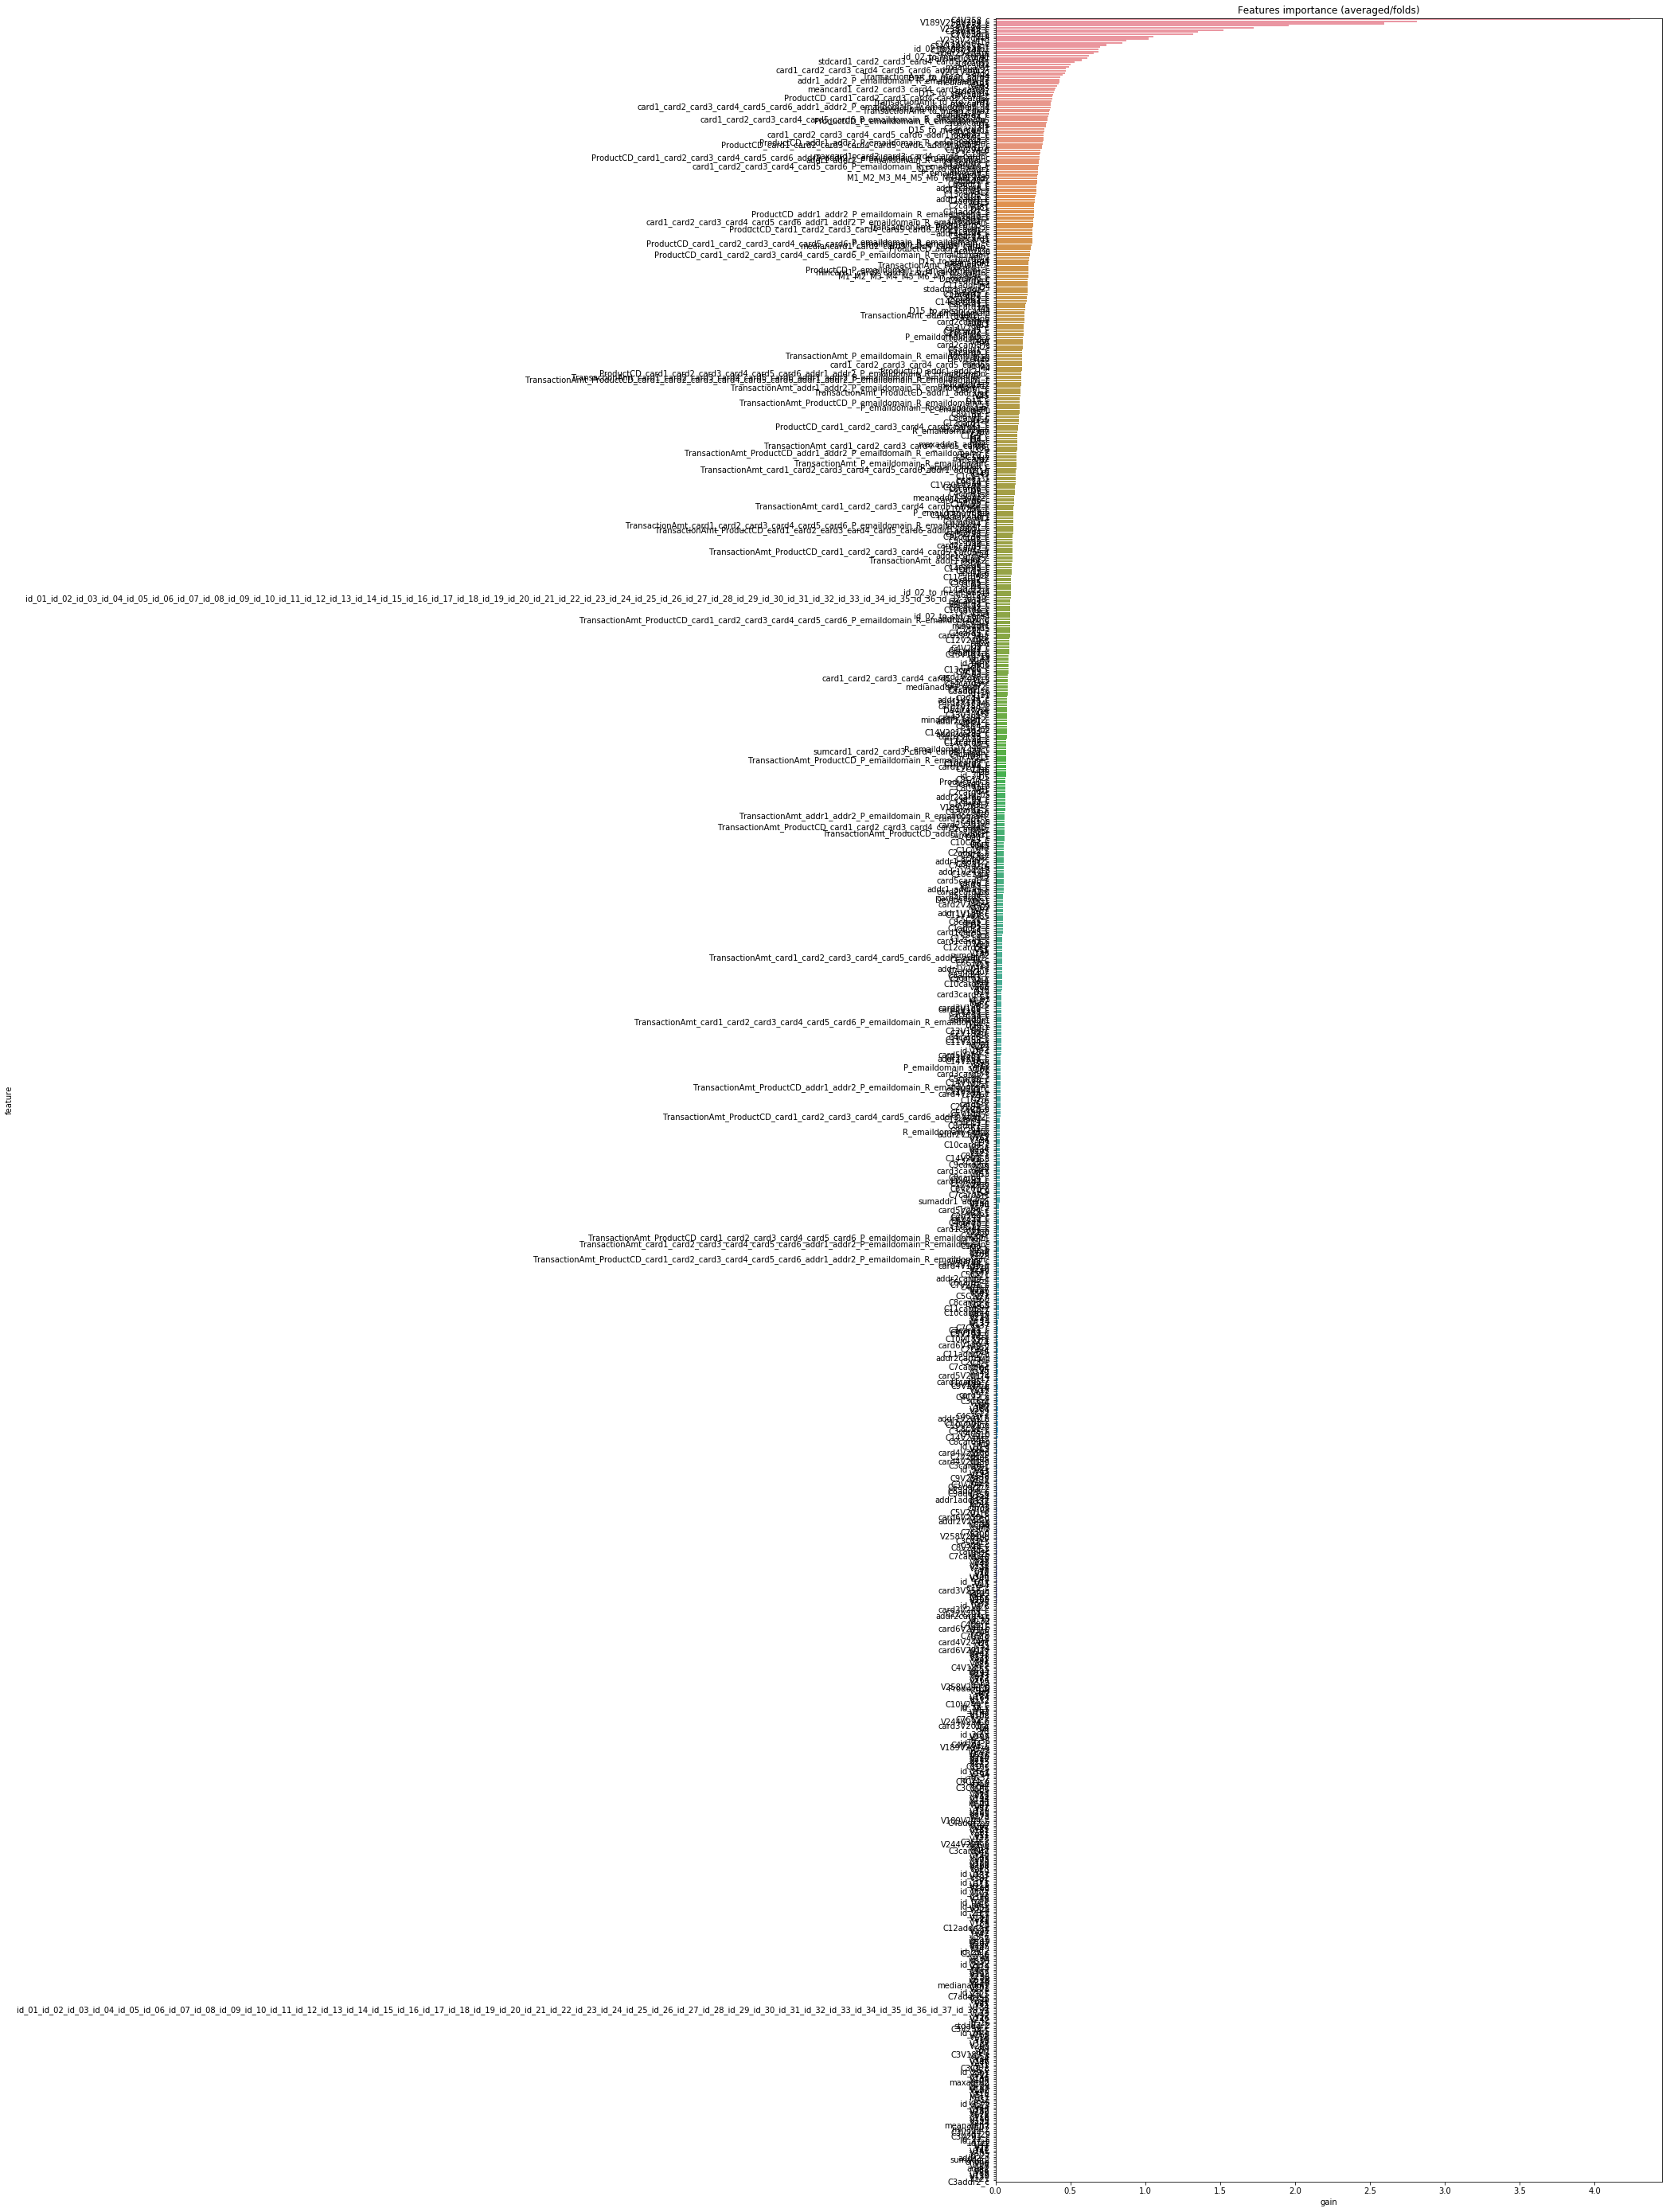

In [39]:
# plot feature importance
#feat=train_df.columns
print("Features Importance...")
gain = bst.feature_importance('gain')
featureimp = pd.DataFrame({'feature':bst.feature_name(), 
                   'split':bst.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)

plt.figure(figsize=(15,50))
sns.barplot(x="gain", y="feature", data=featureimp)
plt.title('Features importance (averaged/folds)')
plt.tight_layout()

In [ ]:
cv_pred*5

In [23]:
sample_submission['isFraud'] = final_cv_pred
sample_submission.to_csv('lightgbm.csv')

In [ ]:
gain = bst.feature_importance('gain')
featureimp = pd.DataFrame({'feature':bst.feature_name(), 
                   'split':bst.feature_importance('split'), 
                   'gain':100 * gain / gain.sum()}).sort_values('gain', ascending=False)
featureimp[:]['feature'].values

In [7]:
way_2=[['C1','V258'], ['C1','C14'], ['C12','V258'], ['V225','V258'], ['V258','V294'],
       ['V201','V258'], ['C1','C13'], ['C14','V294'], ['V91','card6'], ['C1','V74'],
       ['V201','V294'], ['C1','V201'], ['C14','C8'], ['C12','D2'], ['C11','C14'], ['V308','V74'],
       ['V131','V91'], ['V187','V258'], ['C4','V258'], ['C8','D2']]

cols=[['C1','C14'],['C13','C14'],['addr1','card1'],['card1','card2'],['C14','C8'],['C13','V258'],['C1','V258'],['V189','V258'],['C1','V201'],["C1","C13"],['V258','V262'],['C14','V294'],['V258','V244'],['V258','V201'],['V201','V244'],['V225','V258'],['V258','V294']]


In [14]:
(way_2+cols)

[['C1', 'V258'],
 ['C1', 'C14'],
 ['C12', 'V258'],
 ['V225', 'V258'],
 ['V258', 'V294'],
 ['V201', 'V258'],
 ['C1', 'C13'],
 ['C14', 'V294'],
 ['V91', 'card6'],
 ['C1', 'V74'],
 ['V201', 'V294'],
 ['C1', 'V201'],
 ['C14', 'C8'],
 ['C12', 'D2'],
 ['C11', 'C14'],
 ['V308', 'V74'],
 ['V131', 'V91'],
 ['V187', 'V258'],
 ['C4', 'V258'],
 ['C8', 'D2'],
 ['C1', 'C14'],
 ['C13', 'C14'],
 ['addr1', 'card1'],
 ['card1', 'card2'],
 ['C14', 'C8'],
 ['C13', 'V258'],
 ['C1', 'V258'],
 ['V189', 'V258'],
 ['C1', 'V201'],
 ['C1', 'C13'],
 ['V258', 'V262'],
 ['C14', 'V294'],
 ['V258', 'V244'],
 ['V258', 'V201'],
 ['V201', 'V244'],
 ['V225', 'V258'],
 ['V258', 'V294']]